In [1]:
from keras.datasets import mnist
import numpy as np
import matplotlib.pyplot as plt

from keras.layers import Input, Dense, Conv2D, MaxPooling2D, UpSampling2D
from keras.models import Model

from keras.callbacks import TensorBoard

Using TensorFlow backend.


In [2]:
(x_train, _), (x_test, _) = mnist.load_data()

x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = np.reshape(x_train, (len(x_train), 28, 28, 1))  
x_test = np.reshape(x_test, (len(x_test), 28, 28, 1))  

noise_factor = 0.5
x_train_noisy = x_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_train.shape) 
x_test_noisy = x_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_test.shape) 

x_train_noisy = np.clip(x_train_noisy, 0., 1.)
x_test_noisy = np.clip(x_test_noisy, 0., 1.)

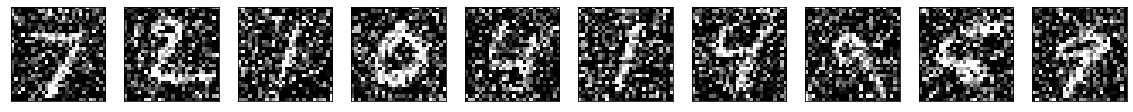

In [3]:
n = 10

plt.figure(figsize = (20 , 2))

for i in range(n):
    ax = plt.subplot(1, n, i + 1)
    plt.imshow(x_test_noisy[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

In [4]:
input_img = Input(shape = (28, 28, 1))  # adapt this if using `channels_first` image data format

x = Conv2D(32, (3, 3), activation='relu', padding='same')(input_img)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)

encoded = MaxPooling2D((2, 2), padding='same')(x)

# at this point the representation is (7, 7, 32)

x = Conv2D(32, (3, 3), activation='relu', padding='same')(encoded)
x = UpSampling2D((2, 2))(x)
x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)

decoded = Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)

autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')

In [7]:
autoencoder.fit(x_train_noisy, x_train,
                epochs = 50,
                batch_size = 128,
                shuffle = True,
                validation_data = (x_test_noisy, x_test),
                )

#callbacks=[TensorBoard(log_dir='/tmp/tb', histogram_freq=0, write_graph=False)]

Train on 60000 samples, validate on 10000 samples
Epoch 1/50
60000/60000 [==============================] - 40s 659us/step - loss: 0.6785 - val_loss: 0.6645
Epoch 2/50
60000/60000 [==============================] - 39s 645us/step - loss: 0.6360 - val_loss: 0.5959
Epoch 3/50
60000/60000 [==============================] - 39s 651us/step - loss: 0.5462 - val_loss: 0.5173
Epoch 4/50
60000/60000 [==============================] - 50s 829us/step - loss: 0.5070 - val_loss: 0.5059
Epoch 5/50
60000/60000 [==============================] - 50s 826us/step - loss: 0.4979 - val_loss: 0.4974
Epoch 6/50
60000/60000 [==============================] - 52s 859us/step - loss: 0.4894 - val_loss: 0.4887
Epoch 7/50
60000/60000 [==============================] - 55s 911us/step - loss: 0.4805 - val_loss: 0.4796
Epoch 8/50
60000/60000 [==============================] - 61s 1ms/step - loss: 0.4712 - val_loss: 0.4695
Epoch 9/50
60000/60000 [==============================] - 58s 970us/step - loss: 0.4605 - val_lo

C:\Users\limon\anaconda3\lib\site-packages\keras\callbacks\callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.100052). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)


60000/60000 [==============================] - 91s 2ms/step - loss: 0.1694 - val_loss: 0.1680- ETA - ETA: 9s - loss: - ETA: 8s - loss:  - ETA: 7s - loss: 0 - ETA: 6s - loss: 0.1 - ETA: 5s - loss: 0 - ETA: 4s  - ETA: 2s - lo - ETA: 0s - loss: 0.16
Epoch 42/50
60000/60000 [==============================] - 82s 1ms/step - loss: 0.1684 - val_loss: 0.1670 1: - ETA: 1:10 - loss: 0.168 - ETA: 1:10 - loss: - ETA: 1:08 - loss: 0.168 -  - ETA: 1:02 - loss:  - ETA: - ETA: 54s - loss: 0. - ET - ETA: 2s - lo - ETA: 0s - loss: 0. - ETA: 0s - loss: 0.168
Epoch 43/50
60000/60000 [==============================] - 83s 1ms/step - loss: 0.1675 - val_loss: 0.16611 - ETA: 1:06 - loss: 0.1 - ETA: 1:06 - loss: 0.16 - ETA: 1:06 - loss: 0.1 - ETA: 1:06 - loss: 0.168 - ETA: 1:06 - loss: 0.168 - ETA: 1:06 - loss: 0. - ETA: 1:06 - loss: 0.16 - ETA: 1:05 - loss: 0 - ETA: 1:05 - l - ETA: 57s - loss - ETA - ETA: 56s - loss: 0.16 - - ETA: 54s - loss: 0.16 - ETA: 53s - loss: 0. - ETA: 53s -  - ETA: 52 - ETA: 51s - los

C:\Users\limon\anaconda3\lib\site-packages\keras\callbacks\callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.101184). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)


60000/60000 [==============================] - 84s 1ms/step - loss: 0.1650 - val_loss: 0.1636ETA: 18s - loss:  - ETA: 15s - loss - ETA: 14s -  - ETA: 13s - loss - ETA: 13s - loss: 0.16 - ETA: 13s  - ETA: 11s - loss: 0.16 - ETA: 11s - loss:  - ETA: 11s - loss - ETA: 10s - los - ETA: 9s - loss: 0.16 - ETA: 9s - los - ETA: 7s - los - ETA: 6s - loss: 0.16 - ETA: 5s - loss: 0. - ETA: 5s - loss: 0 - ETA: 4s - loss: 0.1 - ETA: 3s - loss: 0.1 - ETA: 3s - loss:  - ETA: 2s - loss: 0 - ETA: 1s - los
Epoch 47/50
60000/60000 [==============================] - 94s 2ms/step - loss: 0.1642 - val_loss: 0.1628A: 1:22 - loss: 0.16 - ETA: 1:22 - l - ETA: 1:21 - ETA: 1:1 - ETA: 1:16 - loss: 0.16 - ETA: 1:15 - loss:  - ETA: 1:14 - loss: - ETA: 1:12 - loss: 0. - ETA - ETA: 15s - los
Epoch 48/50
60000/60000 [==============================] - 92s 2ms/step - loss: 0.1635 - val_loss: 0.1621 - loss: 0. - ETA - ETA: 53s  - ETA: 49s - loss - ETA - ETA: 46s - loss: 0.16 - ETA: 46s  - ETA - ETA: 41s - loss - ETA: 40s

In [9]:
encoded_imgs = autoencoder.predict(x_test)
decoded_imgs = autoencoder.predict(encoded_imgs)

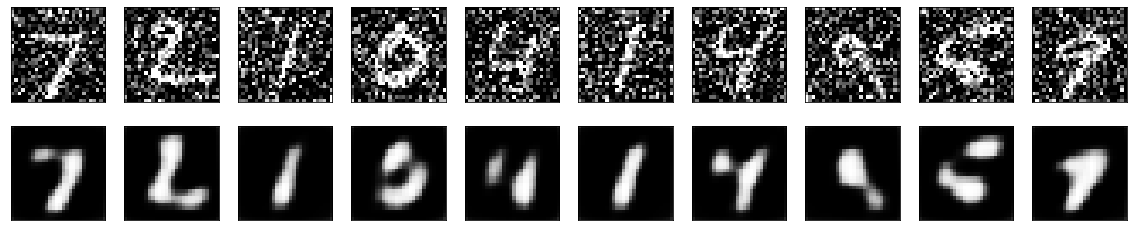

In [13]:
import matplotlib.pyplot as plt

n = 10 
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test_noisy[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()